In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [2]:
df  = pd.read_csv("C://Users//rakes//Desktop//MLP//car price.csv")

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19


In [41]:
df.size

1292

In [42]:
df.shape

(68, 19)

In [44]:
df.isnull().sum()

car_ID            0
symboling         0
CarName           0
fueltype          0
aspiration        0
doornumber        0
carbody           0
drivewheel        0
enginelocation    0
wheelbase         0
carlength         0
carwidth          0
carheight         0
curbweight        0
enginetype        0
cylindernumber    0
enginesize        0
fuelsystem        0
boreratio         0
dtype: int64

In [46]:
df.iloc[:,3]

0        gas
1        gas
2        gas
3        gas
4        gas
       ...  
63    diesel
64       gas
65       gas
66    diesel
67    diesel
Name: fueltype, Length: 68, dtype: object

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_ID          68 non-null     int64  
 1   symboling       68 non-null     int64  
 2   CarName         68 non-null     int64  
 3   fueltype        68 non-null     object 
 4   aspiration      68 non-null     object 
 5   doornumber      68 non-null     object 
 6   carbody         68 non-null     object 
 7   drivewheel      68 non-null     object 
 8   enginelocation  68 non-null     object 
 9   wheelbase       68 non-null     float64
 10  carlength       68 non-null     float64
 11  carwidth        68 non-null     float64
 12  carheight       68 non-null     float64
 13  curbweight      68 non-null     int64  
 14  enginetype      68 non-null     object 
 15  cylindernumber  68 non-null     object 
 16  enginesize      68 non-null     int64  
 17  fuelsystem      68 non-null     objec

In [50]:
def tran_CarName(x):
    if x=="audi 100":
        return 1

In [51]:
df[' tran_CarName']=df['CarName'].apply(tran_CarName)

In [52]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,tran_CarName
0,1,3,1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,14,mpfi,14,None
1,2,3,2,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,14,mpfi,14,None
2,3,1,0,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,19,mpfi,0,None
3,4,2,3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,9,mpfi,8,None
4,5,2,4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,17,mpfi,8,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,64,0,50,diesel,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,13,idi,12,None
64,65,0,45,gas,std,four,hatchback,fwd,front,98.8,177.8,66.5,55.5,2425,ohc,four,13,2bbl,12,None
65,66,0,46,gas,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2670,ohc,four,18,mpfi,21,None
66,67,0,52,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2700,ohc,four,16,idi,13,None


In [57]:
# Count num of particular elements in A coloumn

import csv
from collections import Counter
from itertools import chain
with open('C://Users//rakes//Desktop//MLP//car price.csv') as csvfile:
    next(csvfile)
    counts = Counter(chain.from_iterable(csv.reader(csvfile)))

'car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio\n'

In [58]:
print("gas= {}".format(counts["1"]))
print("diesel= {}".format(counts["2"]))

gas= 26
diesel= 9


In [59]:
df.drop('car_ID', inplace=True, axis=1)
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,tran_CarName
0,3,1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,14,mpfi,14,None
1,3,2,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,14,mpfi,14,None
2,1,0,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,19,mpfi,0,None
3,2,3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,9,mpfi,8,None
4,2,4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,17,mpfi,8,None


In [60]:
# give charCTER A Numeric value

def tran_fueltype(x):
    if x=='gas':
        return 1
    if x=='diesel':
        return 2
   

In [61]:
df['tran_fueltype']=df['fueltype'].apply(tran_fueltype)

In [62]:
df

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,tran_CarName,tran_fueltype
0,3,1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,14,mpfi,14,None,1
1,3,2,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,14,mpfi,14,None,1
2,1,0,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,19,mpfi,0,None,1
3,2,3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,9,mpfi,8,None,1
4,2,4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,17,mpfi,8,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0,50,diesel,std,four,sedan,fwd,front,98.8,177.8,66.5,55.5,2443,ohc,four,13,idi,12,None,2
64,0,45,gas,std,four,hatchback,fwd,front,98.8,177.8,66.5,55.5,2425,ohc,four,13,2bbl,12,None,1
65,0,46,gas,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2670,ohc,four,18,mpfi,21,None,1
66,0,52,diesel,std,four,sedan,rwd,front,104.9,175.0,66.1,54.4,2700,ohc,four,16,idi,13,None,2


In [63]:
df.drop('fueltype', inplace=True, axis=1)
df.head()

,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,tran_CarName,tran_fueltype
0,3,1,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,14,mpfi,14,None,1
1,3,2,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,14,mpfi,14,None,1
2,1,0,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,19,mpfi,0,None,1
3,2,3,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,9,mpfi,8,None,1
4,2,4,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,17,mpfi,8,None,1


In [64]:
# label character in single scale
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['aspiration'] = le.fit_transform(df['aspiration'])
df['doornumber'] = le.fit_transform(df['doornumber'])
df['carbody'] = le.fit_transform(df['carbody'])
df['drivewheel'] = le.fit_transform(df['drivewheel'])
df['enginelocation'] = le.fit_transform(df['enginelocation'])

In [65]:
df.head()

,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,tran_CarName,tran_fueltype
0,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,14,mpfi,14,None,1
1,3,2,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,14,mpfi,14,None,1
2,1,0,0,1,1,2,0,94.5,171.2,65.5,52.4,2823,ohcv,six,19,mpfi,0,None,1
3,2,3,0,0,2,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,9,mpfi,8,None,1
4,2,4,0,0,2,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,17,mpfi,8,None,1


In [66]:
df["CarName_cat"]  = pd.cut(
                        df['CarName'],        
                        bins = 2,
                        labels = ["new", "old"]
                        )

In [67]:
df.head()

,symboling,CarName,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,tran_CarName,tran_fueltype,CarName_cat
0,3,1,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,14,mpfi,14,None,1,new
1,3,2,0,1,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,14,mpfi,14,None,1,new
2,1,0,0,1,1,2,0,94.5,171.2,65.5,52.4,2823,ohcv,six,19,mpfi,0,None,1,new
3,2,3,0,0,2,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,9,mpfi,8,None,1,new
4,2,4,0,0,2,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,17,mpfi,8,None,1,new


In [68]:
print("new= {}".format(counts["1"]))
print("old= {}".format(counts["2"]))

new= 26
old= 9


In [69]:
# KNN mean
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

X=df[['CarName','enginelocation']]
Y=df[['enginesize']]

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=1)

In [71]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, Y_train)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean')

In [72]:
Y_pred = knn.predict(X_test)

In [73]:
confusion_matrix(Y_test, Y_pred)

array([[1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.17647058823529413

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=1)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=6)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=8)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=9)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=11)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=12)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=13)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=14)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=16)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=17)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=18)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=19)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=21)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=22)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=23)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=24)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=25)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=26)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=27)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=28)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=29)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=30)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=31)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=32)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=33)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=34)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=35)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=36)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=37)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=38)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=39)

<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Error Rate vs. K Value')

Text(0.5, 0, 'K')

Text(0, 0.5, 'Error Rate')

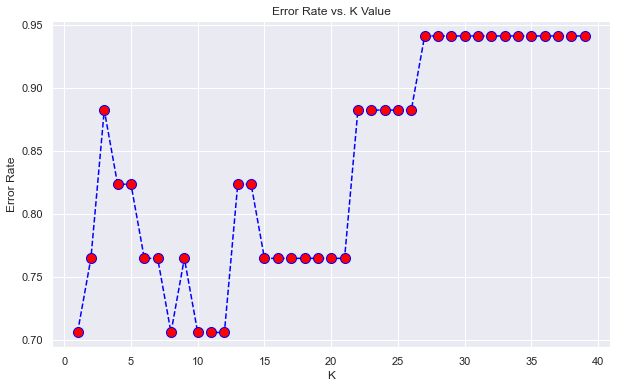

Minimum error:- 0.7058823529411764 at K = 1


In [75]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,Y_train)
 pred_i = knn.predict(X_test)
 #print (pred_i)
 #print (1-accuracy_score(y_test, pred_i))
 error_rate.append(1-accuracy_score(Y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [76]:
knn = KNeighborsClassifier(n_neighbors=14, metric='euclidean')
knn.fit(X_train, Y_train)

C:\Users\rakes\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(metric='euclidean', n_neighbors=14)

In [77]:
Y_pred = knn.predict(X_test)

In [78]:
accuracy_score(Y_test, Y_pred)

0.17647058823529413

In [80]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import export_graphviz


In [81]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [82]:
X=df[['CarName','enginelocation']]
Y=df[['enginesize']]

In [83]:
ss = StandardScaler()
ss.fit(X)
X = ss.transform(X)

StandardScaler()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3,shuffle = True, stratify = Y)

In [85]:
X_train.shape 
print()

X_test.shape  
print()

(51, 2)

(17, 2)

In [86]:
ct = dtree(criterion="gini",max_depth=None)

In [87]:
ct.fit(X_train,Y_train)

DecisionTreeClassifier()

In [88]:
Y_pred = ct.predict(X_test)

In [89]:
len(Y_pred)

17

In [90]:
len(Y_test)

17

In [91]:
print("Accuracy Score:",accuracy_score(Y_test, Y_pred))

Accuracy Score: 0.11764705882352941


<Figure size 1080x648 with 0 Axes>

[Text(323.3863636363636, 464.778, 'X[0] <= 14.5\ngini = 0.932\nsamples = 51\nvalue = [1, 1, 1, 1, 8, 3, 2, 1, 2, 1, 5, 1, 1, 4\n2, 2, 1, 4, 1, 1, 3, 1, 3, 1]'),
 Text(101.45454545454545, 415.85400000000004, 'X[0] <= 9.5\ngini = 0.837\nsamples = 17\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0\n2, 2, 0, 4, 0, 0, 3, 0, 3, 0]'),
 Text(50.72727272727273, 366.93, 'X[0] <= 2.5\ngini = 0.76\nsamples = 11\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0\n2, 2, 0, 4, 0, 0, 0, 0, 0, 0]'),
 Text(25.363636363636363, 318.006, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n2, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(76.0909090909091, 318.006, 'X[0] <= 8.5\ngini = 0.691\nsamples = 9\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0\n0, 2, 0, 4, 0, 0, 0, 0, 0, 0]'),
 Text(50.72727272727273, 269.082, 'X[0] <= 3.5\ngini = 0.571\nsamples = 7\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0\n0, 2, 0, 4, 0, 0, 0, 0, 0, 0]'),
 Text(25.363636363636363, 220.15800000000002, '

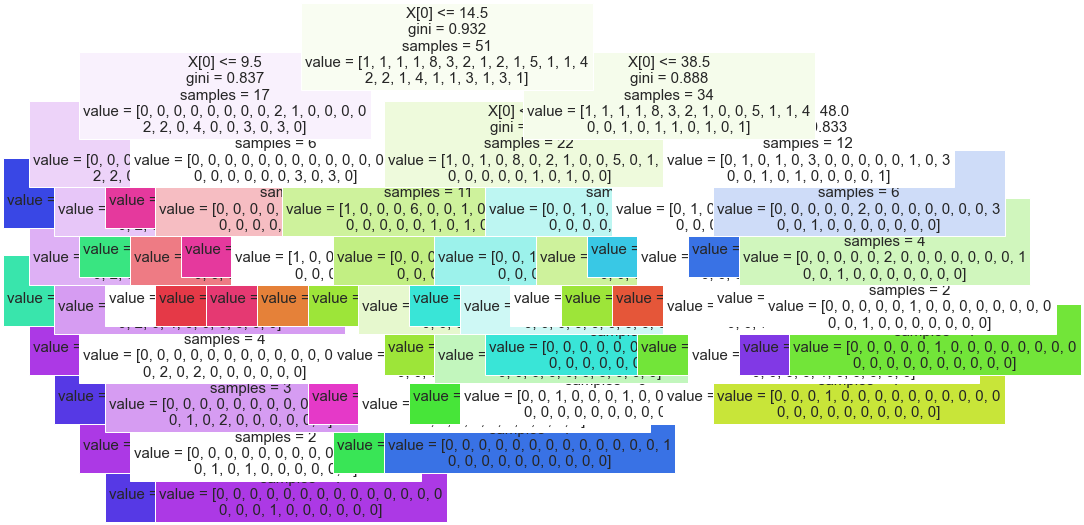

In [92]:
from sklearn import tree
plt.figure(figsize=(15,9))
tree.plot_tree(ct, filled=True, fontsize=15)

In [93]:
#Random forest 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [94]:
model = RandomForestRegressor(random_state=1)
model.fit(X_train, Y_train)

C:\Users\rakes\AppData\Local\Temp/ipykernel_6564/1616795480.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, Y_train)


RandomForestRegressor(random_state=1)

In [95]:
Yhat = model.predict(X_test)
print (Yhat)
# evaluate predictions
mae = mean_absolute_error(Y_test, Yhat)
print('MAE: %.3f' % mae)

[ 6.19416667  8.92933333 13.56       12.65333333  6.25333333 13.34
  9.32        6.32        6.25333333 13.72        9.67       10.39333333
  7.974       4.          8.92933333  6.25333333 17.925     ]
MAE: 5.252


In [96]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,Y_train)

y_pred=clf.predict(X_test)

C:\Users\rakes\AppData\Local\Temp/ipykernel_6564/117644506.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train,Y_train)


RandomForestClassifier()

In [97]:
from sklearn.metrics import accuracy_score

In [98]:
accuracy_score(Y_test, Y_pred)

0.11764705882352941